In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import yaml
import glob
import json

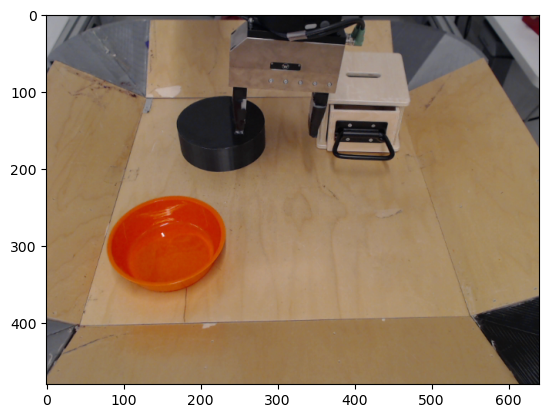

In [11]:
data = np.load('data/fixed_drawer/obj_fixed_drawer_distractor1.npy', allow_pickle=True)
image = cv2.cvtColor(data[0]["observations"][0]["hires_image_observation"], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


In [3]:
def visualize_structure(data, get_length=False, name="root"):
    if isinstance(data, dict):
        node = {f"{name} (dict)": {}}
        for key, value in data.items():
            node[f"{name} (dict)"][key] = visualize_structure(data=value, name=key, get_length=get_length)
        return node
    elif isinstance(data, list):
        elements = [visualize_structure(data=data[0], name=f"{name}_0", get_length=get_length)] if data else []
        if len(data) > 1:
            elements.append("...")
        node = {f"{name} (list, length={len(data) if get_length else "0"})": elements}
        return node
    elif isinstance(data, np.ndarray):
        if data.dtype == object:
            elements = [visualize_structure(data=data[0], name=f"{name}_0", get_length=get_length)] if len(data) > 0 else []
            if len(data) > 1:
                elements.append("...")
            node = {f"{name} (np.array, dtype=object, length={len(data) if get_length else "0"})": elements}
        else:
            shape_str = tuple(data.shape) if data.ndim > 1 else data.shape[0]
            node = {f"{name} (np.array, shape={shape_str}, dtype={data.dtype})": None}
        return node
    else:
        return {f"{name} ({type(data).__name__})": None}

In [12]:
tree = visualize_structure(data=data, get_length=True)
yaml_str = yaml.dump(tree, default_flow_style=False)
print(yaml_str)

root (np.array, dtype=object, length=10):
- root_0 (dict):
    actions:
      actions (list, length=44):
      - actions_0 (np.array, shape=4, dtype=float64): null
      - '...'
    agent_infos:
      agent_infos (list, length=44):
      - agent_infos_0 (dict):
          hand_distance:
            hand_distance (float64): null
          hand_success:
            hand_success (float64): null
      - '...'
    env_infos:
      env_infos (list, length=44):
      - env_infos_0 (dict):
          hand_distance:
            hand_distance (float64): null
          hand_success:
            hand_success (float64): null
      - '...'
    next_observations:
      next_observations (list, length=44):
      - next_observations_0 (dict):
          achieved_goal:
            achieved_goal (np.array, shape=3, dtype=float64): null
          desired_goal:
            desired_goal (np.array, shape=3, dtype=float64): null
          hires_image_observation:
            hires_image_observation (np.array, sh

In [5]:
def count_unique_structure_in_files(files, get_length=False):
    unique_structures = set()
    
    for file in files:
        data = np.load(file, allow_pickle=True)
        for _, struct in enumerate(data): # trajectories
            struct_repr = visualize_structure(struct, get_length)
            struct_hash = json.dumps(struct_repr, sort_keys=True)
            unique_structures.add(struct_hash)
        
        return len(unique_structures), unique_structures

In [7]:

files = glob.glob("data/**/*.npy", recursive=True)
print("Number of trajectories:", sum(len(file) for file in files))
num_unique, unique_hashes = count_unique_structure_in_files(files, get_length=False)
print(f"Number of unique structures: {num_unique} \n (Without considering length of lists/arrays. Strictly topological.)")
    

Number of trajectories: 11601
Number of unique structures: 1 
 (Without considering length of lists/arrays. Strictly topological.)
